In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_score_ds_1.csv', sep=',')
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,1,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,265.0,21.46538,5,312.494089,0
1,2,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,266.0,21.46538,6,284.629162,0
2,3,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,267.0,21.46538,3,331.209863,0
3,4,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,268.0,21.46538,1,223.451310,0
4,5,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,269.0,21.46538,2,341.489231,0


In [3]:
x = df.drop('credit_score', axis=1)
x.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,payment_behaviour,monthly_balance
0,1,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,265.0,21.46538,5,312.494089
1,2,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,266.0,21.46538,6,284.629162
2,3,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,267.0,21.46538,3,331.209863
3,4,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,268.0,21.46538,1,223.451310
4,5,23.0,5,19114.12,1824.843333,3.0,4.0,4.0,4.0,269.0,21.46538,2,341.489231


In [4]:
y = df['credit_score']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: credit_score, dtype: int64

In [5]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = df.drop('credit_score', axis=1)
norm_x = preprocessing.normalize(x)
names = x.columns
scaled_norm_x = pd.DataFrame(norm_x, columns=names)
y = df['credit_score']

x_train, x_test, y_train, y_test = train_test_split(scaled_norm_x, y, random_state = 1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
model = RandomForestClassifier(n_estimators=1100, max_depth=1, random_state=24, n_jobs=-1).fit(x_train, y_train)

In [7]:
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)

In [8]:
from sklearn.metrics import roc_auc_score

print('Тренировочный ', roc_auc_score(y_train, predict_train))
print('Тестовый ', roc_auc_score(y_test, predict_test))


Тренировочный  0.5
Тестовый  0.5


In [11]:
score_test = []
score_train = []
for ii in np.arange(100, 3000, 100):
    for i in np.arange(1, 41, 1):
        print(i)
        print(ii)
        model_test = RandomForestClassifier(verbose=1, n_estimators=ii, max_depth=i, random_state=24, n_jobs=-1).fit(x_train, y_train)
        predict_test = model_test.predict(x_test)
        predict_train = model_test.predict(x_train)
        print('Тестовая выборка:', roc_auc_score(y_test, predict_test))
        print('Тренировочная выборка:', roc_auc_score(y_train, predict_train))
        score_test.append(roc_auc_score(y_test, predict_test))
        score_train.append(roc_auc_score(y_train, predict_train))


1
100
Тестовая выборка: 0.5
Тренировочная выборка: 0.5
2
100
Тестовая выборка: 0.5
Тренировочная выборка: 0.5
3
100
Тестовая выборка: 0.5367114645284476
Тренировочная выборка: 0.5355544987796058
4
100
Тестовая выборка: 0.5812108361401633
Тренировочная выборка: 0.5869129984355481
5
100
Тестовая выборка: 0.6376555059722876
Тренировочная выборка: 0.6436929292156682
6
100
Тестовая выборка: 0.681038571779822
Тренировочная выборка: 0.6858275856033303
7
100
Тестовая выборка: 0.7064641999840282
Тренировочная выборка: 0.7138233689838384
8
100
Тестовая выборка: 0.7282365775389328
Тренировочная выборка: 0.7405469795386301
9
100
Тестовая выборка: 0.7417677923602549
Тренировочная выборка: 0.7599622340486262
10
100
Тестовая выборка: 0.7567841104578149
Тренировочная выборка: 0.7814617186904963
11
100
Тестовая выборка: 0.7699810691609964
Тренировочная выборка: 0.8017420242186487
12
100
Тестовая выборка: 0.7820353641106943
Тренировочная выборка: 0.8223653212636417
13
100
Тестовая выборка: 0.79315045690

KeyboardInterrupt: 

In [12]:
print(max(score_test), score_test.index(max(score_test)))

0.860471388519897 476


In [13]:
mpl.style.use(['ggplot'])

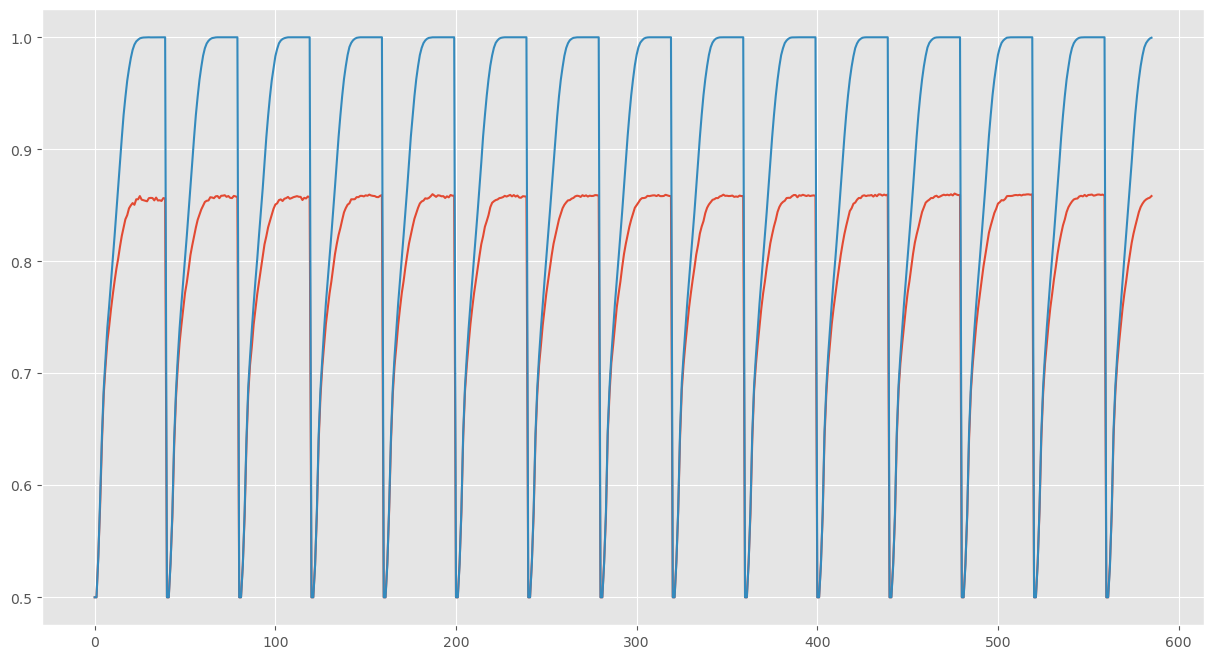

In [14]:
plt.figure(figsize = (15, 8))
plt.plot(score_test)
plt.plot(score_train)
plt.show()